In [7]:
addpath('data/', 'dimension_reduction/', 'PDE_solver/', 'misc/'); 

In [8]:
%% Compute PDE system matrix 
N = 50; 
Compute_systemMatrix_Graph( N );

#### Load graph structure & compute homeostasis

In [19]:
global cDiff 
set_system_paramters;
cDiff=0.1^3;

In [ ]:
global BC 
ntest = 0; %Nestorowa node 9 
[BC, uHS, indSig] = edge_graph( ntest ); 

In [29]:
%% IC 
[uinit] = IC_graph( 0.5, uHS*0.05, ntest );

T = 4; dt = 0.00025; Tstep = 2;
[uPlot, nCellPlot] = Time_Integ_RK4( @Compute_du_graph, @BC_graph, uinit, T, dt, Tstep, @Compute_nCell_graph );     

Elapsed time is 10.406919 seconds.



###### Solve PDE in Normal condition to homeostasis

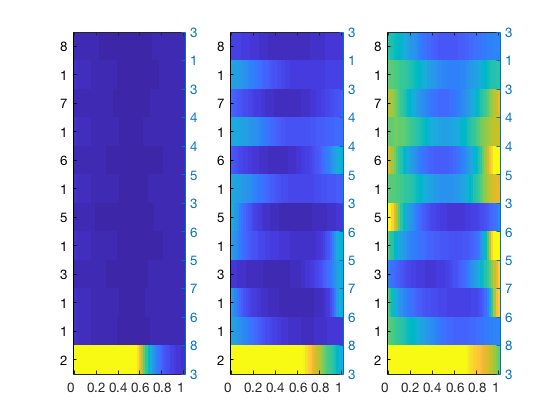

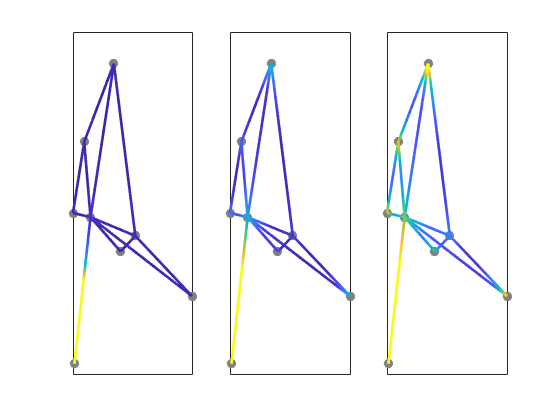

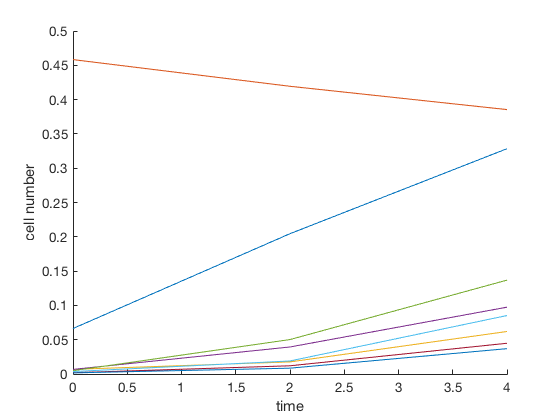

In [31]:
for nn = 1:size( uPlot, 3 ); 
    plot_graph3d( uPlot(:,:,nn), 111, [1,size( uPlot, 3 ),nn] ); caxis( [0 1])
    plot_graph2d( uPlot(:,:,nn), 112, [1,size( uPlot, 3 ),nn] ); caxis( [0 1])
end
figure; hold on;  
plot( [0:Tstep:T], nCellPlot' ); 
    xlabel( 'time' ); ylabel( 'cell number' ); 

###### Solve PDE in AML condition 